In [2]:
import pandas as pd
import numpy as np
df=pd.read_csv('MaunaLoaDailyTemps.csv',index_col='DATE',parse_dates=True)
df=df.dropna()
print('Shape of data',df.shape)
df.head()

Shape of data (1821, 5)


,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758


<AxesSubplot:xlabel='DATE'>

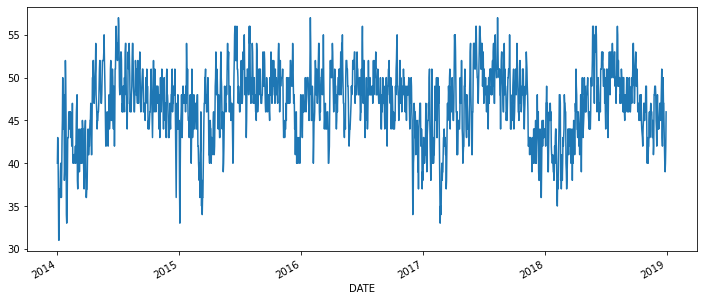

In [3]:
df['AvgTemp'].plot(figsize=(12,5))

In [4]:

from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [5]:
adf_test(df['AvgTemp'])

1. ADF :  -6.554680125068781
2. P-Value :  8.67593748019951e-09
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1808
5. Critical Values :
	 1% :  -3.433972018026501
	 5% :  -2.8631399192826676
	 10% :  -2.5676217442756872


In [7]:

from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

stepwise_fit = auto_arima(df['AvgTemp'], 
                          suppress_warnings=True)           

stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1821
Model:               SARIMAX(1, 0, 5)   Log Likelihood               -4139.061
Date:                Sat, 21 Aug 2021   AIC                           8294.123
Time:                        01:26:06   BIC                           8338.180
Sample:                             0   HQIC                          8310.376
                               - 1821                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.1362      0.348      3.263      0.001       0.454       1.819
ar.L1          0.9757      0.007    130.290      0.000       0.961       0.990
ma.L1         -0.1278      0.024     -5.419      0.000      -0.174      -0.082
ma.L2         -0.2233      0.024     -9.296      0.000      -0.270      -0.176
ma.L3         -0.2027      0.024     -8.491      0.000      -0.249      -0.156
ma.L4         -0.1394      0.023     -6.119      0.000      -0.184      -0.095
ma.L5         -0.0547      0.024     -2.241      0.025      -0.103      -0.007
sigma2         5.5114      0.173     31.875      0.000       5.173       5.850
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                20.00
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.17
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [8]:
from statsmodels.tsa.arima_model import ARIMA
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)
print(test.iloc[0],test.iloc[-1])

(1821, 5)
(1791, 5) (30, 5)
MinTemp      36.0
MaxTemp      52.0
AvgTemp      44.0
Sunrise     640.0
Sunset     1743.0
Name: 2018-12-01 00:00:00, dtype: float64 MinTemp      39.0
MaxTemp      52.0
AvgTemp      46.0
Sunrise     656.0
Sunset     1754.0
Name: 2018-12-30 00:00:00, dtype: float64


In [9]:
#train the model
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train['AvgTemp'],order=(1,0,5))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1791
Model:                     ARMA(1, 5)   Log Likelihood               -4070.198
Method:                       css-mle   S.D. of innovations              2.347
Date:                Sat, 21 Aug 2021   AIC                           8156.395
Time:                        01:36:01   BIC                           8200.320
Sample:                             0   HQIC                          8172.614
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            46.5857      0.785     59.355      0.000      45.047      48.124
ar.L1.AvgTemp     0.9856      0.007    150.631      0.000       0.973       0.998
ma.L1.AvgTemp    -0.1412      0.025     -5.735      0.000      -0.190      -0.093
ma.L2.AvgTemp    -0.2268      0.024     -9.295      0.000      -0.275      -0.179
ma.L3.AvgTemp    -0.2168      0.026     -8.416      0.000      -0.267      -0.166
ma.L4.AvgTemp    -0.1479      0.023     -6.300      0.000      -0.194      -0.102
ma.L5.AvgTemp    -0.0595      0.025     -2.411      0.016      -0.108      -0.011
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0146           +0.0000j            1.0146            0.0000
MA.1            1.0883           -0.0000j            1.0883           -0.0000
MA.2            0.0555           -1.8423j            1.8431           -0.2452
MA.3            0.0555           +1.8423j            1.8431            0.2452
MA.4           -1.8432           -1.0734j            2.1330           -0.4161
MA.5           -1.8432           +1.0734j            2.1330            0.4161
-----------------------------------------------------------------------------
"""

<AxesSubplot:>

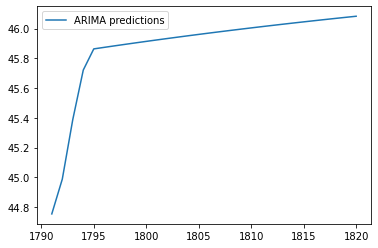

In [10]:
start=len(train)
end=len(train)+len(test)-1
#if the predicted values dont have date values as index, you will have to uncomment the following two commented lines to plot a graph
#index_future_dates=pd.date_range(start='2018-12-01',end='2018-12-30')
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
#pred.index=index_future_dates
pred.plot(legend=True)

<AxesSubplot:xlabel='DATE'>

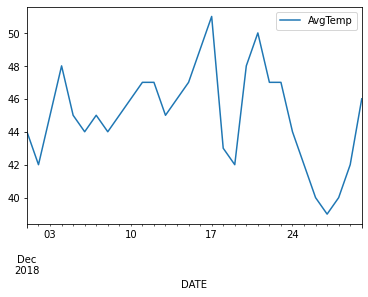

In [11]:
test['AvgTemp'].plot(legend=True)

<AxesSubplot:xlabel='DATE'>

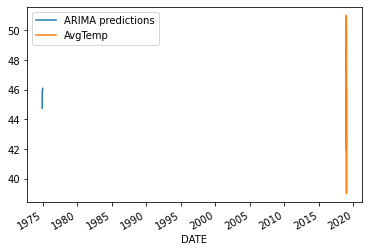

In [16]:
pred.plot(legend='ARIMA Predictions')
test['AvgTemp'].plot(legend=True)

In [14]:

test['AvgTemp'].mean()

45.0

In [18]:

from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['AvgTemp']))
print(rmse)

3.000494971948993


In [19]:
model2=ARIMA(df['AvgTemp'],order=(1,0,5))
model2=model2.fit()
df.tail()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2018-12-26,35.0,45.0,40.0,654,1752
2018-12-27,33.0,44.0,39.0,655,1752
2018-12-28,33.0,47.0,40.0,655,1753
2018-12-29,36.0,47.0,42.0,655,1753
2018-12-30,39.0,52.0,46.0,656,1754


In [20]:
index_future_dates=pd.date_range(start='2018-12-30',end='2019-01-29')
#print(index_future_dates)
pred=model2.predict(start=len(df),end=len(df)+30,typ='levels').rename('ARIMA Predictions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)

2018-12-30    46.418064
2018-12-31    46.113783
2019-01-01    45.617772
2019-01-02    45.249556
2019-01-03    45.116985
2019-01-04    45.136772
2019-01-05    45.156281
2019-01-06    45.175517
2019-01-07    45.194484
2019-01-08    45.213185
2019-01-09    45.231624
2019-01-10    45.249804
2019-01-11    45.267730
2019-01-12    45.285405
2019-01-13    45.302832
2019-01-14    45.320015
2019-01-15    45.336957
2019-01-16    45.353662
2019-01-17    45.370133
2019-01-18    45.386373
2019-01-19    45.402386
2019-01-20    45.418174
2019-01-21    45.433741
2019-01-22    45.449090
2019-01-23    45.464224
2019-01-24    45.479146
2019-01-25    45.493859
2019-01-26    45.508366
2019-01-27    45.522670
2019-01-28    45.536773
2019-01-29    45.550678
Freq: D, Name: ARIMA Predictions, dtype: float64


<AxesSubplot:>

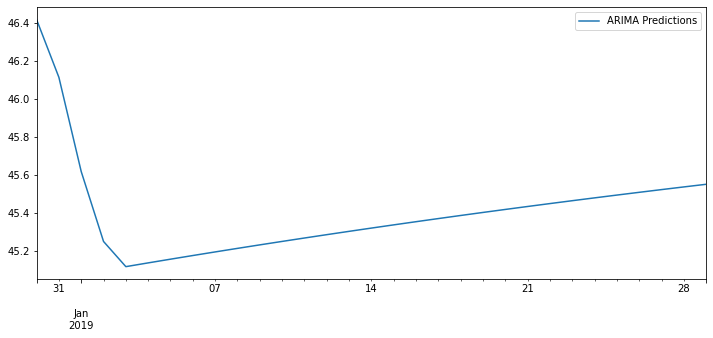

In [21]:

pred.plot(figsize=(12,5),legend=True)